<a href="https://colab.research.google.com/github/labrijisaad/Git-Clustering/blob/main/notebooks/Acuracy Benchmark/GIT Accuracy Benchmark - Small Scale Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center><a><span style="color:blue">`Evaluating GIT` - Accuracy Benchmarking on Small-Scale Datasets</span></a></center>

#### Objective

The goal of this notebook is to benchmark the GIT clustering algorithm against other standard clustering algorithms using four classic **small-scale datasets** (Iris, Wine, Hepatitis, Breast Cancer, Fish). We aim to evaluate the accuracy and performance of GIT in a controlled, comparative study.

In this benchmarking study, we will compare the GIT clustering algorithm with the following clustering techniques:

- HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)
- Spectral Clustering
- K-Means
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Agglomerative Clustering
- Gaussian Mixture Models (GMM)

#### Install the `packages` & Prepare the `data` ( Install this if needed )

In [1]:
# !pip install -i "https://test.pypi.org/simple/" git_cluster > /dev/null 
# !pip install hdbscan > /dev/null
# !pip install -U gdown > /dev/null
# !gdown 1yNwCStP3Sdf2lfvNe9h0WIZw2OQ3O2UP && unzip datasets.zip > /dev/null

#### Import the Libraries

In [2]:
import warnings ; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

from utils import measures_calculator, alignPredictedWithTrueLabels
from dataloaders import Real_DataLoader as Real_DataLoader

# Data Path (TO REPLACE in COLAB with "/content/datasets/real_datasets")
real_datasets_path = "../../datasets/real_datasets"

#### Note on **Clustering Performance Metrics**

##### F1 Score - **`F1`**
The F1 Score represents the harmonic mean of precision and recall. When applied to clustering, it assesses the correspondence between clusters and ground truth labels. It ranges from 0 to 1, with 1 indicating perfect precision and recall alignment.

##### Adjusted Rand Index - **`ARI`**
The ARI measures the similarity between two sets of data clusters, adjusted for chance. It offers a score that signifies whether the clustering is superior to random assignment. A value of 1 denotes a perfect match, 0 signifies random labeling, and negative values imply less agreement than expected by chance.

##### Accuracy - **`ACC`**
Accuracy in clustering is typically computed after aligning clusters with ground truth labels. It quantifies the proportion of correct predictions among the total predictions made. However, its utility is contingent upon such alignment, given that clustering doesn't inherently strive to replicate external labels.

##### Normalized Mutual Information - **`NMI`**
NMI is a modification of the Mutual Information (MI) score that considers cluster sizes and normalizes the score between 0 (no mutual information) and 1 (perfect correlation). It gauges the shared information between predicted clusters and true labels.

##### Cover Rate - **`Cover Rate`**
Cover rate usually indicates how effectively the clustering algorithm encompasses the dataset with its clusters. A cover rate of 1 indicates that each data point has been assigned to a cluster, while a value less than 1 suggests some data points remain unassigned.

##### Silhouette Score - **`Silhouette`** 
The Silhouette Score assesses cluster separation and cohesion, ranging from -1 (poor clustering) to 1 (clear, distinct clusters). It helps evaluate clustering quality without needing true labels.

## <center><a><span style="color:green">Real Datasets - `Iris`</span></a></center>

### Load the Iris data

In [3]:
X_iris, Y_iris_true = Real_DataLoader(name='iris', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_iris_true))
num_features = len(X_iris[0])
total_rows = len(X_iris)

# Print out the dataset characteristics
print(f"The 'iris' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'iris' Dataset has: 3 Clusters, 4 Features, and 150 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [4]:
from git_cluster import GIT

In [5]:
# Start the timer
start_time = time.time()

# Create an instance of the GIT clustering
git = GIT(k=15, target_ratio=[1, 1, 1])

# Apply the GIT algorithm to predict the clusters in the data
Y_iris_pred_git = git.fit_predict(X_iris)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_iris_pred_git, Y_iris_true = alignPredictedWithTrueLabels(Y_iris_pred_git, Y_iris_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_iris = measures_calculator(X_iris, Y_iris_pred_git, Y_iris_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_iris["Algo"] = git.__class__.__name__
perf_metrics_git_iris["dataset"] = "iris"
perf_metrics_git_iris["TotalProcessingTime"] = processing_time

perf_metrics_git_iris

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.883153,0.706006,0.88,0.756087,0.503251,1.0,3,GIT,iris,0.08075


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [6]:
import hdbscan

In [7]:
# Start the timer
start_time = time.time()

# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=5, 
                            min_samples=1)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_iris)

# Get the predicted Clusters
Y_iris_pred_hdbscan = hdbscan.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_iris_pred_hdbscan, Y_iris_true = alignPredictedWithTrueLabels(Y_iris_pred_hdbscan, Y_iris_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_iris = measures_calculator(X_iris, Y_iris_pred_hdbscan, Y_iris_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_iris["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_iris["dataset"] = "iris"
perf_metrics_hdbscan_iris["TotalProcessingTime"] = processing_time

perf_metrics_hdbscan_iris

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.777778,0.568116,0.666667,0.73368,0.503251,1.0,3,HDBSCAN,iris,0.011859


### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [8]:
from sklearn.cluster import SpectralClustering

In [9]:
# Start the timer
start_time = time.time()

# Create an instance of the Spectral Clustering algorithm 
spectral_clustering = SpectralClustering(n_clusters=3, assign_labels="discretize",
                                         random_state=0, affinity='rbf')

# Apply the Spectral Clustering algorithm to predict the clusters in the data
spectral_clustering.fit(X_iris)

# Get the predicted Clusters
Y_iris_pred_speclustr = spectral_clustering.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_iris_pred_speclustr, Y_iris_true = alignPredictedWithTrueLabels(Y_iris_pred_speclustr, Y_iris_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_speclustr_iris = measures_calculator(X_iris, Y_iris_pred_speclustr, Y_iris_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_speclustr_iris["Algo"] = spectral_clustering.__class__.__name__
perf_metrics_speclustr_iris["dataset"] = "iris"
perf_metrics_speclustr_iris["TotalProcessingTime"] = processing_time

perf_metrics_speclustr_iris

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.901225,0.743683,0.9,0.766036,0.503251,1.0,3,SpectralClustering,iris,0.038154


### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [10]:
from sklearn.cluster import KMeans

In [11]:
# Start the timer
start_time = time.time()

# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=3, random_state=0)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_iris)

# Get the predicted Clusters
Y_iris_pred_kmeans = kmeans.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_iris_pred_kmeans, Y_iris_true = alignPredictedWithTrueLabels(Y_iris_pred_kmeans, Y_iris_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_iris = measures_calculator(X_iris, Y_iris_pred_kmeans, Y_iris_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_iris["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_iris["dataset"] = "iris"
perf_metrics_kmeans_iris["TotalProcessingTime"] = processing_time

perf_metrics_kmeans_iris

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.888055,0.716342,0.886667,0.741912,0.503251,1.0,3,KMeans,iris,0.221359


### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
# Start the timer
start_time = time.time()

# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=1.6, min_samples=10)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_iris_pred_dbscan = dbscan.fit_predict(X_iris)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_iris_pred_dbscan, Y_iris_true = alignPredictedWithTrueLabels(Y_iris_pred_dbscan, Y_iris_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_iris = measures_calculator(X_iris, Y_iris_pred_dbscan, Y_iris_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_iris["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_iris["dataset"] = "iris"
perf_metrics_dbscan_iris["TotalProcessingTime"] = processing_time

perf_metrics_dbscan_iris

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.777778,0.568116,0.666667,0.73368,0.503251,1.0,3,DBSCAN,iris,0.004118


### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
# Start the timer
start_time = time.time()

# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_iris_pred_agg = agg_clustering.fit_predict(X_iris)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_iris_pred_agg, Y_iris_true = alignPredictedWithTrueLabels(Y_iris_pred_agg, Y_iris_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_iris = measures_calculator(X_iris, Y_iris_pred_agg, Y_iris_true)
perf_metrics_agg_iris

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_iris["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_iris["dataset"] = "iris"
perf_metrics_agg_iris["TotalProcessingTime"] = processing_time

perf_metrics_agg_iris

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.908533,0.759199,0.906667,0.805694,0.503251,1.0,3,AgglomerativeClustering,iris,0.003303


### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [16]:
from sklearn.mixture import GaussianMixture

In [17]:
# Start the timer
start_time = time.time()

# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=3, random_state=0, init_params='k-means++')

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_iris)
Y_iris_pred_gmm = gmm.predict(X_iris)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_iris_pred_gmm, Y_iris_true = alignPredictedWithTrueLabels(Y_iris_pred_gmm, Y_iris_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_iris = measures_calculator(X_iris, Y_iris_pred_gmm, Y_iris_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_iris["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_iris["dataset"] = "iris"
perf_metrics_gmm_iris["TotalProcessingTime"] = processing_time

perf_metrics_gmm_iris

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.96675,0.903874,0.966667,0.899694,0.503251,1.0,3,GaussianMixture,iris,0.021501


### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [18]:
full_perf_metrics_iris = pd.concat([perf_metrics_git_iris, 
                                    perf_metrics_hdbscan_iris,
                                    perf_metrics_speclustr_iris,
                                    perf_metrics_kmeans_iris,
                                    perf_metrics_dbscan_iris,
                                    perf_metrics_agg_iris,
                                    perf_metrics_gmm_iris], ignore_index=True)
full_perf_metrics_iris

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.883153,0.706006,0.880000,0.756087,0.503251,1.0,3,GIT,iris,0.080750
1,0.777778,0.568116,0.666667,0.733680,0.503251,1.0,3,HDBSCAN,iris,0.011859
2,0.901225,0.743683,0.900000,0.766036,0.503251,1.0,3,SpectralClustering,iris,0.038154
3,0.888055,0.716342,0.886667,0.741912,0.503251,1.0,3,KMeans,iris,0.221359
4,0.777778,0.568116,0.666667,0.733680,0.503251,1.0,3,DBSCAN,iris,0.004118
5,0.908533,0.759199,0.906667,0.805694,0.503251,1.0,3,AgglomerativeClustering,iris,0.003303
6,0.966750,0.903874,0.966667,0.899694,0.503251,1.0,3,GaussianMixture,iris,0.021501


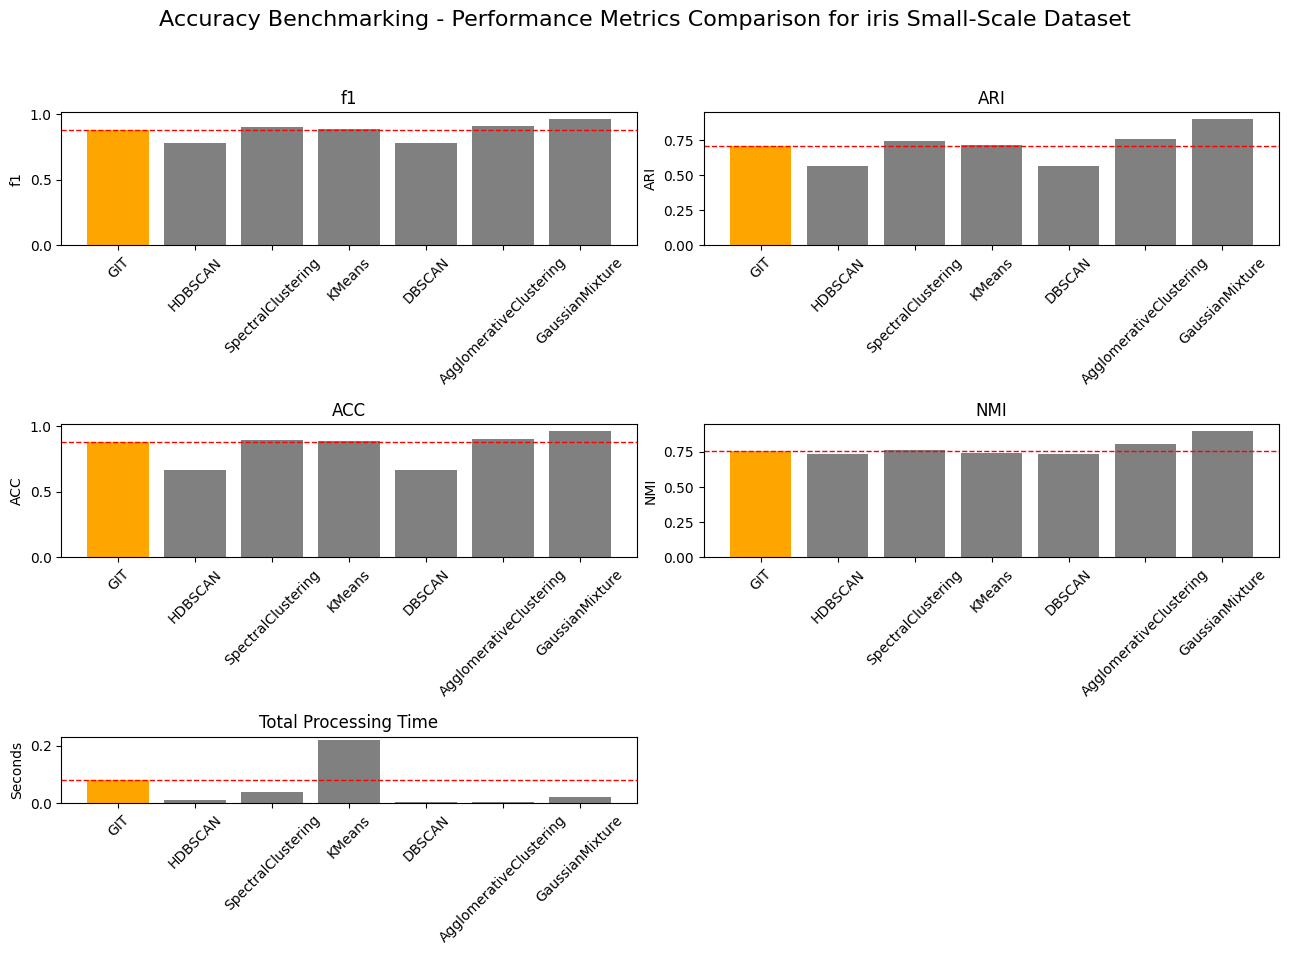

In [19]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_iris['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_iris[full_perf_metrics_iris['Algo'] == benchmark_algo][metrics].values.flatten()

# Calculate the total processing time score for reference line
git_total_processing_time_score = full_perf_metrics_iris[full_perf_metrics_iris['Algo'] == benchmark_algo]['TotalProcessingTime'].values[0]

# Create subplots with an extra subplot for the total processing time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 10), gridspec_kw={'height_ratios': [1, 1, 0.5]})
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Small-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_iris['Algo'], full_perf_metrics_iris[metric], 
           color=['orange' if x == benchmark_algo else 'grey' for x in full_perf_metrics_iris['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

# Add the last subplot for total processing time
ax_last = axs[2, 0]
ax_last.bar(full_perf_metrics_iris['Algo'], full_perf_metrics_iris['TotalProcessingTime'], 
            color=['orange' if x == benchmark_algo else 'grey' for x in full_perf_metrics_iris['Algo']])
ax_last.set_title('Total Processing Time')
ax_last.set_ylabel('Seconds')
ax_last.tick_params(axis='x', rotation=45)
ax_last.axhline(y=git_total_processing_time_score, color='r', linestyle='--', linewidth=1)

# Hide the empty subplot
fig.delaxes(axs[2][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Small-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()

## <center><a><span style="color:green">Real Datasets - `Wine`</span></a></center>

### Load the Wine data

In [20]:
X_wine, Y_wine_true = Real_DataLoader(name='wine', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_wine_true))
num_features = len(X_wine[0])
total_rows = len(X_wine)

# Print out the dataset characteristics
print(f"The 'wine' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'wine' Dataset has: 3 Clusters, 13 Features, and 178 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [21]:
from git_cluster import GIT

In [22]:
# Start the timer
start_time = time.time()

# Create an instance of the GIT clustering
git = GIT(k=20, target_ratio=[1, 1, 1])

# Apply the GIT algorithm to predict the clusters in the data
Y_wine_pred_git = git.fit_predict(X_wine)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_wine_pred_git, Y_wine_true = alignPredictedWithTrueLabels(Y_wine_pred_git, Y_wine_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_wine = measures_calculator(X_wine, Y_wine_pred_git, Y_wine_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_wine["Algo"] = git.__class__.__name__
perf_metrics_git_wine["dataset"] = "wine"
perf_metrics_git_wine["TotalProcessingTime"] = processing_time

perf_metrics_git_wine

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.900735,0.713308,0.898876,0.75702,0.200083,1.0,3,GIT,wine,0.128402


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [23]:
import hdbscan

In [24]:
# Start the timer
start_time = time.time()

# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=2, gen_min_span_tree=True)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_wine)

# Get the predicted Clusters
Y_wine_pred_hdbscan = hdbscan.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_wine_pred_hdbscan, Y_wine_true = alignPredictedWithTrueLabels(Y_wine_pred_hdbscan, Y_wine_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_wine = measures_calculator(X_wine, Y_wine_pred_hdbscan, Y_wine_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_wine["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_wine["dataset"] = "wine"
perf_metrics_hdbscan_wine["TotalProcessingTime"] = processing_time

perf_metrics_hdbscan_wine

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.678477,0.29075,0.606742,0.402635,0.200083,1.0,3,HDBSCAN,wine,0.007603


### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [25]:
from sklearn.cluster import SpectralClustering

In [26]:
# Start the timer
start_time = time.time()

# Create an instance of the Spectral Clustering algorithm 
spectral_clustering = SpectralClustering(n_clusters=3, assign_labels="discretize", 
                                         random_state=0, affinity='rbf')

# Apply the Spectral Clustering algorithm to predict the clusters in the data
spectral_clustering.fit(X_wine)

# Get the predicted Clusters
Y_wine_pred_speclustr = spectral_clustering.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_wine_pred_speclustr, Y_wine_true = alignPredictedWithTrueLabels(Y_wine_pred_speclustr, Y_wine_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_speclustr_wine = measures_calculator(X_wine, Y_wine_pred_speclustr, Y_wine_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_speclustr_wine["Algo"] = spectral_clustering.__class__.__name__
perf_metrics_speclustr_wine["dataset"] = "wine"
perf_metrics_speclustr_wine["TotalProcessingTime"] = processing_time

perf_metrics_speclustr_wine

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.466706,0.01346,0.432584,0.014041,0.200083,1.0,3,SpectralClustering,wine,1.236818


### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [27]:
from sklearn.cluster import KMeans

In [28]:
# Start the timer
start_time = time.time()

# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=3, random_state=0)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_wine)

# Get the predicted Clusters
Y_wine_pred_kmeans = kmeans.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_wine_pred_kmeans, Y_wine_true = alignPredictedWithTrueLabels(Y_wine_pred_kmeans, Y_wine_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_wine = measures_calculator(X_wine, Y_wine_pred_kmeans, Y_wine_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_wine["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_wine["dataset"] = "wine"
perf_metrics_kmeans_wine["TotalProcessingTime"] = processing_time

perf_metrics_kmeans_wine

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.689714,0.371114,0.702247,0.428757,0.200083,1.0,3,KMeans,wine,0.005312


### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
# Start the timer
start_time = time.time()

# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=100, min_samples=1)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_wine_pred_dbscan = dbscan.fit_predict(X_wine)

# Align the predicted labels with the true labels for accurate evaluation
Y_wine_pred_dbscan, Y_wine_true = alignPredictedWithTrueLabels(Y_wine_pred_dbscan, Y_wine_true)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_wine = measures_calculator(X_wine, Y_wine_pred_dbscan, Y_wine_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_wine["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_wine["dataset"] = "wine"
perf_metrics_dbscan_wine["TotalProcessingTime"] = processing_time

perf_metrics_dbscan_wine

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.569551,0.000351,0.404494,0.011128,0.200083,1.0,3,DBSCAN,wine,0.005012


### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
# Start the timer
start_time = time.time()

# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_wine_pred_agg = agg_clustering.fit_predict(X_wine)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_wine_pred_agg, Y_wine_true = alignPredictedWithTrueLabels(Y_wine_pred_agg, Y_wine_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_wine = measures_calculator(X_wine, Y_wine_pred_agg, Y_wine_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_wine["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_wine["dataset"] = "wine"
perf_metrics_agg_wine["TotalProcessingTime"] = processing_time

perf_metrics_agg_wine

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.686376,0.368402,0.696629,0.416077,0.200083,1.0,3,AgglomerativeClustering,wine,0.003652


### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [33]:
from sklearn.mixture import GaussianMixture

In [34]:
# Start the timer
start_time = time.time()

# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=3, random_state=0, max_iter=1000, tol=0.00001)

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_wine)
Y_wine_pred_gmm = gmm.predict(X_wine)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_wine_pred_gmm, Y_wine_true = alignPredictedWithTrueLabels(Y_wine_pred_gmm, Y_wine_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_wine = measures_calculator(X_wine, Y_wine_pred_gmm, Y_wine_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_wine["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_wine["dataset"] = "wine"
perf_metrics_gmm_wine["TotalProcessingTime"] = processing_time

perf_metrics_gmm_wine

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.854373,0.618014,0.853933,0.591595,0.200083,1.0,3,GaussianMixture,wine,0.056382


### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [35]:
full_perf_metrics_wine = pd.concat([perf_metrics_git_wine, 
                                    perf_metrics_hdbscan_wine,
                                    perf_metrics_speclustr_wine,
                                    perf_metrics_kmeans_wine,
                                    perf_metrics_dbscan_wine,
                                    perf_metrics_agg_wine,
                                    perf_metrics_gmm_wine], ignore_index=True)
full_perf_metrics_wine

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.900735,0.713308,0.898876,0.757020,0.200083,1.0,3,GIT,wine,0.128402
1,0.678477,0.290750,0.606742,0.402635,0.200083,1.0,3,HDBSCAN,wine,0.007603
2,0.466706,0.013460,0.432584,0.014041,0.200083,1.0,3,SpectralClustering,wine,1.236818
3,0.689714,0.371114,0.702247,0.428757,0.200083,1.0,3,KMeans,wine,0.005312
4,0.569551,0.000351,0.404494,0.011128,0.200083,1.0,3,DBSCAN,wine,0.005012
5,0.686376,0.368402,0.696629,0.416077,0.200083,1.0,3,AgglomerativeClustering,wine,0.003652
6,0.854373,0.618014,0.853933,0.591595,0.200083,1.0,3,GaussianMixture,wine,0.056382


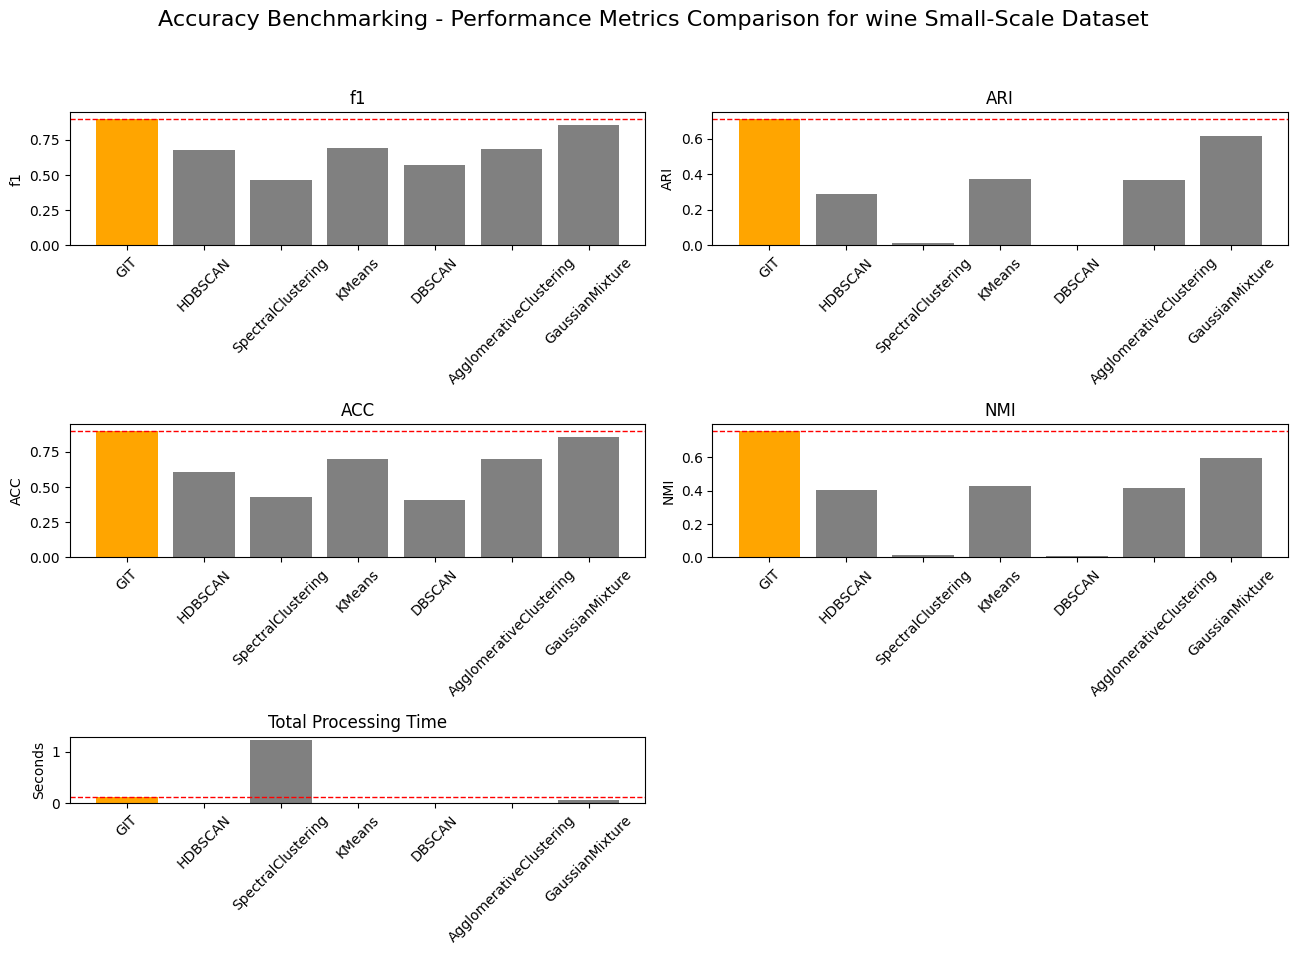

In [36]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_wine['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_wine[full_perf_metrics_wine['Algo'] == benchmark_algo][metrics].values.flatten()

# Calculate the total processing time score for reference line
git_total_processing_time_score = full_perf_metrics_wine[full_perf_metrics_wine['Algo'] == benchmark_algo]['TotalProcessingTime'].values[0]

# Create subplots with an extra subplot for the total processing time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 10), gridspec_kw={'height_ratios': [1, 1, 0.5]})
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Small-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_wine['Algo'], full_perf_metrics_wine[metric], 
           color=['orange' if x == benchmark_algo else 'grey' for x in full_perf_metrics_wine['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

# Add the last subplot for total processing time
ax_last = axs[2, 0]
ax_last.bar(full_perf_metrics_wine['Algo'], full_perf_metrics_wine['TotalProcessingTime'], 
            color=['orange' if x == benchmark_algo else 'grey' for x in full_perf_metrics_wine['Algo']])
ax_last.set_title('Total Processing Time')
ax_last.set_ylabel('Seconds')
ax_last.tick_params(axis='x', rotation=45)
ax_last.axhline(y=git_total_processing_time_score, color='r', linestyle='--', linewidth=1)

# Hide the empty subplot
fig.delaxes(axs[2][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Small-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()

## <center><a><span style="color:green">Real Datasets - `Breast Cancer`</span></a></center>

### Load the Breast Cancer data

In [37]:
X_bc, Y_bc_true = Real_DataLoader(name='breast_cancer', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_bc_true))
num_features = len(X_bc[0])
total_rows = len(X_bc)

# Print out the dataset characteristics
print(f"The 'breast_cancer' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'breast_cancer' Dataset has: 2 Clusters, 30 Features, and 569 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [38]:
from git_cluster import GIT

In [39]:
# Start the timer
start_time = time.time()

# Create an instance of the GIT clustering
git = GIT(k=12, target_ratio=[1, 1])

# Apply the GIT algorithm to predict the clusters in the data
Y_bc_pred_git = git.fit_predict(X_bc)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_bc_pred_git, Y_bc_true = alignPredictedWithTrueLabels(Y_bc_pred_git, Y_bc_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_bc = measures_calculator(X_bc, Y_bc_pred_git, Y_bc_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_bc["Algo"] = git.__class__.__name__
perf_metrics_git_bc["dataset"] = "breast_cancer"
perf_metrics_git_bc["TotalProcessingTime"] = processing_time

perf_metrics_git_bc

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.929613,0.729563,0.927944,0.653727,0.513697,1.0,2,GIT,breast_cancer,0.078601


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [40]:
import hdbscan

In [41]:
# Start the timer
start_time = time.time()

# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=10, 
                          min_samples=10, 
                          gen_min_span_tree=True)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_bc)

# Get the predicted Clusters
Y_bc_pred_hdbscan = hdbscan.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_bc_pred_hdbscan, Y_bc_true = alignPredictedWithTrueLabels(Y_bc_pred_hdbscan, Y_bc_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_bc = measures_calculator(X_bc, Y_bc_pred_hdbscan, Y_bc_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_bc["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_bc["dataset"] = "breast_cancer"
perf_metrics_hdbscan_bc["TotalProcessingTime"] = processing_time

perf_metrics_hdbscan_bc

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.679025,0.518033,0.662566,0.443086,0.513697,1.0,2,HDBSCAN,breast_cancer,0.03796


### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [42]:
from sklearn.cluster import SpectralClustering

In [43]:
# # Start the timer
# start_time = time.time()

# # Create an instance of the Spectral Clustering algorithm 
# spectral_clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", 
#                                          random_state=0, affinity='rbf')

# # Apply the Spectral Clustering algorithm to predict the clusters in the data
# spectral_clustering.fit(X_bc)

# # Get the predicted Clusters
# Y_bc_pred_speclustr = spectral_clustering.labels_

# # Stop the timer and calculate the total processing time
# end_time = time.time()
# processing_time = end_time - start_time

# # Calculate various clustering metrics to evaluate the performance
# perf_metrics_speclustr_bc = measures_calculator(X_bc, Y_bc_pred_speclustr, Y_bc_true)

# # Store additional information about the algorithm and dataset in the result
# perf_metrics_speclustr_bc["Algo"] = spectral_clustering.__class__.__name__
# perf_metrics_speclustr_bc["dataset"] = "breast_cancer"
# perf_metrics_speclustr_bc["TotalProcessingTime"] = processing_time

# perf_metrics_speclustr_bc

### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [44]:
from sklearn.cluster import KMeans

In [45]:
# Start the timer
start_time = time.time()

# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=2, random_state=0)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_bc)

# Get the predicted Clusters
Y_bc_pred_kmeans = kmeans.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_bc_pred_kmeans, Y_bc_true = alignPredictedWithTrueLabels(Y_bc_pred_kmeans, Y_bc_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_bc = measures_calculator(X_bc, Y_bc_pred_kmeans, Y_bc_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_bc["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_bc["dataset"] = "breast_cancer"
perf_metrics_kmeans_bc["TotalProcessingTime"] = processing_time

perf_metrics_kmeans_bc

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.863923,0.491425,0.85413,0.464793,0.513697,1.0,2,KMeans,breast_cancer,0.013621


### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
# Start the timer
start_time = time.time()
# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=100, min_samples=13)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_bc_pred_dbscan = dbscan.fit_predict(X_bc)

# Align the predicted labels with the true labels for accurate evaluation
Y_bc_pred_dbscan, Y_bc_true = alignPredictedWithTrueLabels(Y_bc_pred_dbscan, Y_bc_true)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_bc = measures_calculator(X_bc, Y_bc_pred_dbscan, Y_bc_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_bc["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_bc["dataset"] = "breast_cancer"
perf_metrics_dbscan_bc["TotalProcessingTime"] = processing_time

perf_metrics_dbscan_bc

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.703707,0.450041,0.68717,0.405989,0.513697,1.0,2,DBSCAN,breast_cancer,0.01581


### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [48]:
from sklearn.cluster import AgglomerativeClustering 

In [49]:
# Start the timer
start_time = time.time()

# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_bc_pred_agg = agg_clustering.fit_predict(X_bc)

# Align the predicted labels with the true labels for accurate evaluation
Y_bc_pred_agg, Y_bc_true = alignPredictedWithTrueLabels(Y_bc_pred_agg, Y_bc_true)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_bc = measures_calculator(X_bc, Y_bc_pred_agg, Y_bc_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_bc["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_bc["dataset"] = "breast_cancer"
perf_metrics_agg_bc["TotalProcessingTime"] = processing_time

perf_metrics_agg_bc

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.808766,0.287246,0.778559,0.319082,0.513697,1.0,2,AgglomerativeClustering,breast_cancer,0.019461


### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [50]:
from sklearn.mixture import GaussianMixture

In [51]:
# Start the timer
start_time = time.time()

# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=2, random_state=0)

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_bc)
Y_bc_pred_gmm = gmm.predict(X_bc)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_bc_pred_gmm, Y_bc_true = alignPredictedWithTrueLabels(Y_bc_pred_gmm, Y_bc_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_bc = measures_calculator(X_bc, Y_bc_pred_gmm, Y_bc_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_bc["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_bc["dataset"] = "breast_cancer"
perf_metrics_gmm_bc["TotalProcessingTime"] = processing_time

perf_metrics_gmm_bc

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.950939,0.811632,0.950791,0.706125,0.513697,1.0,2,GaussianMixture,breast_cancer,0.068193


### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [52]:
full_perf_metrics_bc = pd.concat([perf_metrics_git_bc, 
                                    perf_metrics_hdbscan_bc,
                                    perf_metrics_kmeans_bc,
                                    perf_metrics_dbscan_bc,
                                    perf_metrics_agg_bc,
                                    perf_metrics_gmm_bc], ignore_index=True)
full_perf_metrics_bc

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.929613,0.729563,0.927944,0.653727,0.513697,1.0,2,GIT,breast_cancer,0.078601
1,0.679025,0.518033,0.662566,0.443086,0.513697,1.0,2,HDBSCAN,breast_cancer,0.037960
2,0.863923,0.491425,0.854130,0.464793,0.513697,1.0,2,KMeans,breast_cancer,0.013621
3,0.703707,0.450041,0.687170,0.405989,0.513697,1.0,2,DBSCAN,breast_cancer,0.015810
4,0.808766,0.287246,0.778559,0.319082,0.513697,1.0,2,AgglomerativeClustering,breast_cancer,0.019461
5,0.950939,0.811632,0.950791,0.706125,0.513697,1.0,2,GaussianMixture,breast_cancer,0.068193


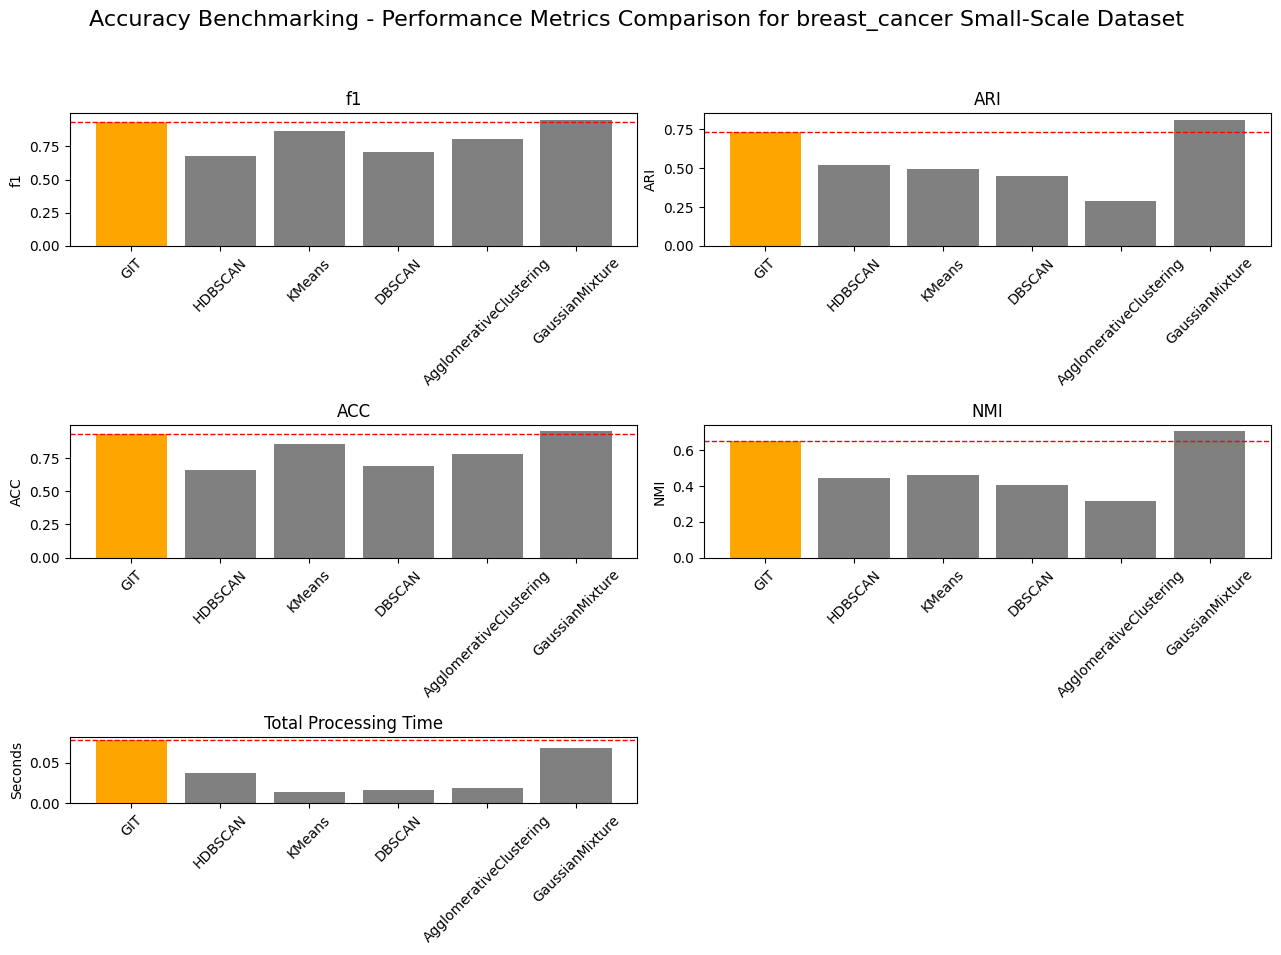

In [53]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_bc['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_bc[full_perf_metrics_bc['Algo'] == benchmark_algo][metrics].values.flatten()

# Calculate the total processing time score for reference line
git_total_processing_time_score = full_perf_metrics_bc[full_perf_metrics_bc['Algo'] == benchmark_algo]['TotalProcessingTime'].values[0]

# Create subplots with an extra subplot for the total processing time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 10), gridspec_kw={'height_ratios': [1, 1, 0.5]})
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Small-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_bc['Algo'], full_perf_metrics_bc[metric], 
           color=['orange' if x == benchmark_algo else 'grey' for x in full_perf_metrics_bc['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

# Add the last subplot for total processing time
ax_last = axs[2, 0]
ax_last.bar(full_perf_metrics_bc['Algo'], full_perf_metrics_bc['TotalProcessingTime'], 
            color=['orange' if x == benchmark_algo else 'grey' for x in full_perf_metrics_bc['Algo']])
ax_last.set_title('Total Processing Time')
ax_last.set_ylabel('Seconds')
ax_last.tick_params(axis='x', rotation=45)
ax_last.axhline(y=git_total_processing_time_score, color='r', linestyle='--', linewidth=1)

# Hide the empty subplot
fig.delaxes(axs[2][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Small-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()

## <center><a><span style="color:green">Real Datasets - `Hepatitis`</span></a></center>

In [54]:
X_hep, Y_hep_true = Real_DataLoader(name='hepatitis', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_hep_true))
num_features = len(X_hep[0])
total_rows = len(X_hep)

# Print out the dataset characteristics
print(f"The 'hepatitis' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'hepatitis' Dataset has: 2 Clusters, 19 Features, and 154 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [55]:
from git_cluster import GIT

In [56]:
# Start the timer
start_time = time.time()

# Create an instance of the GIT clustering
git = GIT(k=8, target_ratio=[1, 1])

# Apply the GIT algorithm to predict the clusters in the data
Y_hep_pred_git = git.fit_predict(X_hep)

# Align the predicted labels with the true labels for accurate evaluation
Y_hep_pred_git, Y_hep_true = alignPredictedWithTrueLabels(Y_hep_pred_git, Y_hep_true)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_hep = measures_calculator(X_hep, Y_hep_pred_git, Y_hep_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_hep["Algo"] = git.__class__.__name__
perf_metrics_git_hep["dataset"] = "hepatitis"
perf_metrics_git_hep["TotalProcessingTime"] = processing_time

perf_metrics_git_hep

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.753824,0.232691,0.766234,0.122613,0.057506,1.0,2,GIT,hepatitis,0.022479


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [57]:
import hdbscan

In [58]:
# Start the timer
start_time = time.time()

# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=2, gen_min_span_tree=True)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_hep)

# Get the predicted Clusters
Y_hep_pred_hdbscan = hdbscan.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_hep_pred_hdbscan, Y_hep_true = alignPredictedWithTrueLabels(Y_hep_pred_hdbscan, Y_hep_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_hep = measures_calculator(X_hep, Y_hep_pred_hdbscan, Y_hep_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_hep["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_hep["dataset"] = "hepatitis"
perf_metrics_hdbscan_hep["TotalProcessingTime"] = processing_time

perf_metrics_hdbscan_hep

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.75167,0.015279,0.720779,0.015472,0.057506,1.0,2,HDBSCAN,hepatitis,0.014241


### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [59]:
from sklearn.cluster import SpectralClustering

In [60]:
# Start the timer
start_time = time.time()

# Create an instance of the Spectral Clustering algorithm 
spectral_clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", 
                                         random_state=0, affinity='rbf')

# Apply the Spectral Clustering algorithm to predict the clusters in the data
spectral_clustering.fit(X_hep)

# Get the predicted Clusters
Y_hep_pred_speclustr = spectral_clustering.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_hep_pred_speclustr, Y_hep_true = alignPredictedWithTrueLabels(Y_hep_pred_speclustr, Y_hep_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_speclustr_hep = measures_calculator(X_hep, Y_hep_pred_speclustr, Y_hep_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_speclustr_hep["Algo"] = spectral_clustering.__class__.__name__
perf_metrics_speclustr_hep["dataset"] = "hepatitis"
perf_metrics_speclustr_hep["TotalProcessingTime"] = processing_time

perf_metrics_speclustr_hep

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.481721,-0.001612,0.525974,0.003411,0.057506,1.0,2,SpectralClustering,hepatitis,0.088451


### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [61]:
from sklearn.cluster import KMeans

In [62]:
# Start the timer
start_time = time.time()

# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=2, random_state=0)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_hep)

# Get the predicted Clusters
Y_hep_pred_kmeans = kmeans.labels_

# Align the predicted labels with the true labels for accurate evaluation
Y_hep_pred_kmeans, Y_hep_true = alignPredictedWithTrueLabels(Y_hep_pred_kmeans, Y_hep_true)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_hep = measures_calculator(X_hep, Y_hep_pred_kmeans, Y_hep_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_hep["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_hep["dataset"] = "hepatitis"
perf_metrics_kmeans_hep["TotalProcessingTime"] = processing_time

perf_metrics_kmeans_hep

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.747157,0.036725,0.727273,0.004382,0.057506,1.0,2,KMeans,hepatitis,0.006153


### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [63]:
from sklearn.cluster import DBSCAN

In [64]:
# Start the timer
start_time = time.time()

# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=500, min_samples=100)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_hep_pred_dbscan = dbscan.fit_predict(X_hep)

# Align the predicted labels with the true labels for accurate evaluation
Y_hep_pred_dbscan, Y_hep_true = alignPredictedWithTrueLabels(Y_hep_pred_dbscan, Y_hep_true)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_hep = measures_calculator(X_hep, Y_hep_pred_dbscan, Y_hep_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_hep["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_hep["dataset"] = "hepatitis"
perf_metrics_dbscan_hep["TotalProcessingTime"] = processing_time

perf_metrics_dbscan_hep

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.884058,0.0,0.792208,0.0,0.057506,1.0,2,DBSCAN,hepatitis,0.007921


### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
# Start the timer
start_time = time.time()

# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_hep_pred_agg = agg_clustering.fit_predict(X_hep)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_hep_pred_agg, Y_hep_true = alignPredictedWithTrueLabels(Y_hep_pred_agg, Y_hep_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_hep = measures_calculator(X_hep, Y_hep_pred_agg, Y_hep_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_hep["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_hep["dataset"] = "hepatitis"
perf_metrics_agg_hep["TotalProcessingTime"] = processing_time

perf_metrics_agg_hep

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.863108,0.015719,0.785714,0.00279,0.057506,1.0,2,AgglomerativeClustering,hepatitis,0.002011


### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [67]:
from sklearn.mixture import GaussianMixture

In [68]:
# Start the timer
start_time = time.time()

# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=2, random_state=0)

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_hep)
Y_hep_pred_gmm = gmm.predict(X_hep)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_hep_pred_gmm, Y_hep_true = alignPredictedWithTrueLabels(Y_hep_pred_gmm, Y_hep_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_hep = measures_calculator(X_hep, Y_hep_pred_gmm, Y_hep_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_hep["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_hep["dataset"] = "hepatitis"
perf_metrics_gmm_hep["TotalProcessingTime"] = processing_time

perf_metrics_gmm_hep

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.738658,0.029897,0.720779,0.003076,0.057506,1.0,2,GaussianMixture,hepatitis,0.020881


### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [69]:
full_perf_metrics_hep = pd.concat([perf_metrics_git_hep, 
                                   perf_metrics_hdbscan_hep,
                                   perf_metrics_speclustr_hep,
                                   perf_metrics_kmeans_hep,
                                   perf_metrics_dbscan_hep,
                                   perf_metrics_agg_hep,
                                   perf_metrics_gmm_hep], ignore_index=True)
full_perf_metrics_hep

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.753824,0.232691,0.766234,0.122613,0.057506,1.0,2,GIT,hepatitis,0.022479
1,0.751670,0.015279,0.720779,0.015472,0.057506,1.0,2,HDBSCAN,hepatitis,0.014241
2,0.481721,-0.001612,0.525974,0.003411,0.057506,1.0,2,SpectralClustering,hepatitis,0.088451
3,0.747157,0.036725,0.727273,0.004382,0.057506,1.0,2,KMeans,hepatitis,0.006153
4,0.884058,0.000000,0.792208,0.000000,0.057506,1.0,2,DBSCAN,hepatitis,0.007921
5,0.863108,0.015719,0.785714,0.002790,0.057506,1.0,2,AgglomerativeClustering,hepatitis,0.002011
6,0.738658,0.029897,0.720779,0.003076,0.057506,1.0,2,GaussianMixture,hepatitis,0.020881


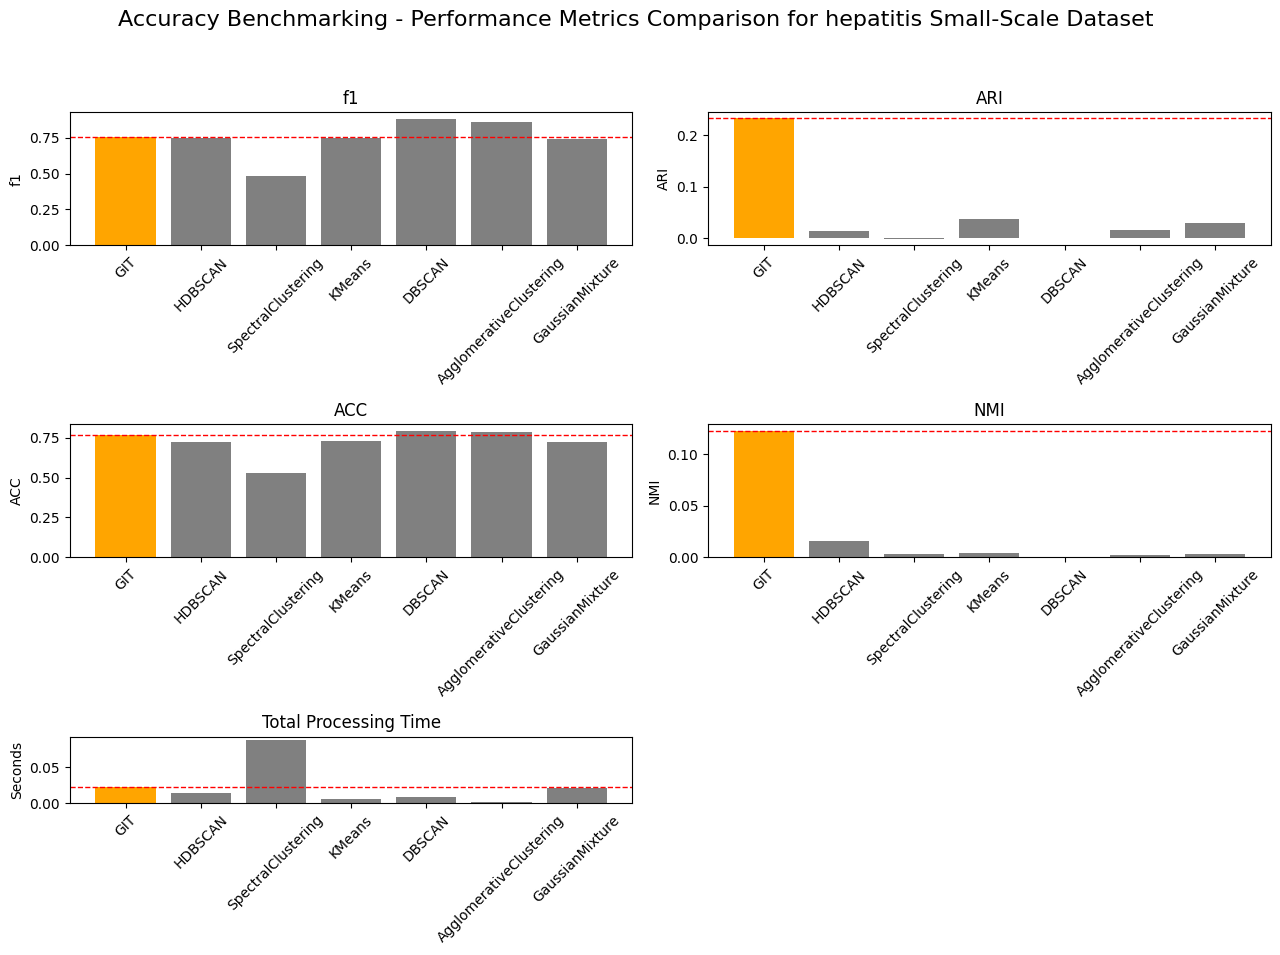

In [70]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_hep['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_hep[full_perf_metrics_hep['Algo'] == benchmark_algo][metrics].values.flatten()

# Calculate the total processing time score for reference line
git_total_processing_time_score = full_perf_metrics_hep[full_perf_metrics_hep['Algo'] == benchmark_algo]['TotalProcessingTime'].values[0]

# Create subplots with an extra subplot for the total processing time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 10), gridspec_kw={'height_ratios': [1, 1, 0.5]})
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Small-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_hep['Algo'], full_perf_metrics_hep[metric], 
           color=['orange' if x == benchmark_algo else 'grey' for x in full_perf_metrics_hep['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

# Add the last subplot for total processing time
ax_last = axs[2, 0]
ax_last.bar(full_perf_metrics_hep['Algo'], full_perf_metrics_hep['TotalProcessingTime'], 
            color=['orange' if x == benchmark_algo else 'grey' for x in full_perf_metrics_hep['Algo']])
ax_last.set_title('Total Processing Time')
ax_last.set_ylabel('Seconds')
ax_last.tick_params(axis='x', rotation=45)
ax_last.axhline(y=git_total_processing_time_score, color='r', linestyle='--', linewidth=1)

# Hide the empty subplot
fig.delaxes(axs[2][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Small-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()

## <center><a><span style="color:green">Real Datasets - `Fish`</span></a></center>

### Load the Fish data

In [71]:
X_fish, Y_fish_true = Real_DataLoader(name='fish', path=real_datasets_path).load()

# Calculate key dataset characteristics
num_clusters = len(np.unique(Y_fish_true))
num_features = len(X_fish[0])
total_rows = len(X_fish)

# Print out the dataset characteristics
print(f"The 'fish' Dataset has: {num_clusters} Clusters, {num_features} Features, and {total_rows} Total Rows.")

The 'fish' Dataset has: 7 Clusters, 6 Features, and 159 Total Rows.


### <span style="color:red">GIT Clustring</span> <a class="anchor"></a>

In [72]:
from git_cluster import GIT

In [73]:
# Start the timer
start_time = time.time()

# Create an instance of the GIT clustering
git = GIT(k=20, target_ratio=[2, 2, 1, 1, 2, 1, 1])

# Apply the GIT algorithm to predict the clusters in the data
Y_fish_pred_git = git.fit_predict(X_fish)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fish_pred_git, Y_fish_true = alignPredictedWithTrueLabels(Y_fish_pred_git, Y_fish_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_fish = measures_calculator(X_fish, Y_fish_pred_git, Y_fish_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_fish["Algo"] = git.__class__.__name__
perf_metrics_git_fish["dataset"] = "fish"
perf_metrics_git_fish["TotalProcessingTime"] = processing_time

perf_metrics_git_fish

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.601962,0.191701,0.503145,0.348263,-0.204943,1.0,7,GIT,fish,0.095015


### <span style="color:red">HDBSCAN</span> <a class="anchor"></a>

In [74]:
import hdbscan

In [75]:
# Start the timer
start_time = time.time()

# Create an instance of the HDBSCAN clustering
hdbscan = hdbscan.HDBSCAN(min_cluster_size=15, 
                            min_samples=10)

# Apply the HDBSCAN algorithm to predict the clusters in the data
hdbscan.fit(X_fish)

# Get the predicted Clusters
Y_fish_pred_hdbscan = hdbscan.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fish_pred_hdbscan, Y_fish_true = alignPredictedWithTrueLabels(Y_fish_pred_hdbscan, Y_fish_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_hdbscan_fish = measures_calculator(X_fish, Y_fish_pred_hdbscan, Y_fish_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_hdbscan_fish["Algo"] = hdbscan.__class__.__name__
perf_metrics_hdbscan_fish["dataset"] = "fish"
perf_metrics_hdbscan_fish["TotalProcessingTime"] = processing_time

perf_metrics_hdbscan_fish

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.363132,0.176932,0.371069,0.323022,-0.204943,1.0,7,HDBSCAN,fish,0.009418


### <span style="color:red">Spectral Clustering</span> <a class="anchor"></a>

In [76]:
from sklearn.cluster import SpectralClustering

In [77]:
# Start the timer
start_time = time.time()

# Create an instance of the Spectral Clustering algorithm 
spectral_clustering = SpectralClustering(n_clusters=7, assign_labels="discretize",
                                         random_state=0, affinity='rbf')

# Apply the Spectral Clustering algorithm to predict the clusters in the data
spectral_clustering.fit(X_fish)

# Get the predicted Clusters
Y_fish_pred_speclustr = spectral_clustering.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fish_pred_speclustr, Y_fish_true = alignPredictedWithTrueLabels(Y_fish_pred_speclustr, Y_fish_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_speclustr_fish = measures_calculator(X_fish, Y_fish_pred_speclustr, Y_fish_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_speclustr_fish["Algo"] = spectral_clustering.__class__.__name__
perf_metrics_speclustr_fish["dataset"] = "fish"
perf_metrics_speclustr_fish["TotalProcessingTime"] = processing_time

perf_metrics_speclustr_fish

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.337398,0.014237,0.314465,0.142271,-0.204943,1.0,7,SpectralClustering,fish,0.070935


### <span style="color:red">K-Means</span> <a class="anchor"></a>

In [78]:
from sklearn.cluster import KMeans

In [79]:
# Start the timer
start_time = time.time()

# Create an instance of the K-means algorithm 
kmeans = KMeans(n_clusters=7, random_state=0)

# Apply the K-means algorithm to predict the clusters in the data
kmeans.fit(X_fish)

# Get the predicted Clusters
Y_fish_pred_kmeans = kmeans.labels_

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fish_pred_kmeans, Y_fish_true = alignPredictedWithTrueLabels(Y_fish_pred_kmeans, Y_fish_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_kmeans_fish = measures_calculator(X_fish, Y_fish_pred_kmeans, Y_fish_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_kmeans_fish["Algo"] = kmeans.__class__.__name__
perf_metrics_kmeans_fish["dataset"] = "fish"
perf_metrics_kmeans_fish["TotalProcessingTime"] = processing_time

perf_metrics_kmeans_fish

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.309116,0.125574,0.295597,0.293222,-0.204943,1.0,7,KMeans,fish,0.007537


### <span style="color:red">DBSCAN</span> <a class="anchor"></a>

In [80]:
from sklearn.cluster import DBSCAN

In [81]:
# Start the timer
start_time = time.time()

# Create an instance of the DBSCAN algorithm
dbscan = DBSCAN(eps=100, min_samples=2)

# Apply the DBSCAN algorithm to predict the clusters in the data
Y_fish_pred_dbscan = dbscan.fit_predict(X_fish)

# Align the predicted labels with the true labels for accurate evaluation
Y_fish_pred_dbscan, Y_fish_true = alignPredictedWithTrueLabels(Y_fish_pred_dbscan, Y_fish_true)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Calculate various clustering metrics to evaluate the performance
perf_metrics_dbscan_fish = measures_calculator(X_fish, Y_fish_pred_dbscan, Y_fish_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_dbscan_fish["Algo"] = dbscan.__class__.__name__
perf_metrics_dbscan_fish["dataset"] = "fish"
perf_metrics_dbscan_fish["TotalProcessingTime"] = processing_time

perf_metrics_dbscan_fish

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.523112,0.015674,0.371069,0.063787,-0.204943,1.0,7,DBSCAN,fish,0.005529


### <span style="color:red">Agglomerative Clustering</span> <a class="anchor"></a>

In [82]:
from sklearn.cluster import AgglomerativeClustering

In [83]:
# Start the timer
start_time = time.time()

# Create an instance of the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=7, linkage='ward')

# Apply the Agglomerative Clustering algorithm to predict the clusters in the data
Y_fish_pred_agg = agg_clustering.fit_predict(X_fish)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fish_pred_agg, Y_fish_true = alignPredictedWithTrueLabels(Y_fish_pred_agg, Y_fish_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_agg_fish = measures_calculator(X_fish, Y_fish_pred_agg, Y_fish_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_agg_fish["Algo"] = agg_clustering.__class__.__name__
perf_metrics_agg_fish["dataset"] = "fish"
perf_metrics_agg_fish["TotalProcessingTime"] = processing_time

perf_metrics_agg_fish

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.372195,0.139222,0.358491,0.303917,-0.204943,1.0,7,AgglomerativeClustering,fish,0.002245


### <span style="color:red">Gaussian Mixture Models (GMM)</span> <a class="anchor"></a>

In [84]:
from sklearn.mixture import GaussianMixture

In [85]:
# Start the timer
start_time = time.time()

# Create an instance of the Gaussian Mixture Models algorithm
gmm = GaussianMixture(n_components=7, random_state=0)

# Fit the Gaussian Mixture Models algorithm to the data and predict the clusters
gmm.fit(X_fish)
Y_fish_pred_gmm = gmm.predict(X_fish)

# Stop the timer and calculate the total processing time
end_time = time.time()
processing_time = end_time - start_time

# Align the predicted labels with the true labels for accurate evaluation
Y_fish_pred_gmm, Y_fish_true = alignPredictedWithTrueLabels(Y_fish_pred_gmm, Y_fish_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_gmm_fish = measures_calculator(X_fish, Y_fish_pred_gmm, Y_fish_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_gmm_fish["Algo"] = gmm.__class__.__name__
perf_metrics_gmm_fish["dataset"] = "fish"
perf_metrics_gmm_fish["TotalProcessingTime"] = processing_time

perf_metrics_gmm_fish

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.374924,0.186414,0.377358,0.358959,-0.204943,1.0,7,GaussianMixture,fish,0.051564


### <span style="color:blue">Benchmark Results</span> <a class="anchor"></a>

In [86]:
full_perf_metrics_fish = pd.concat([perf_metrics_git_fish, 
                                    perf_metrics_hdbscan_fish,
                                    perf_metrics_speclustr_fish,
                                    perf_metrics_kmeans_fish,
                                    perf_metrics_dbscan_fish,
                                    perf_metrics_agg_fish,
                                    perf_metrics_gmm_fish], ignore_index=True)
full_perf_metrics_fish

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset,TotalProcessingTime
0,0.601962,0.191701,0.503145,0.348263,-0.204943,1.0,7,GIT,fish,0.095015
1,0.363132,0.176932,0.371069,0.323022,-0.204943,1.0,7,HDBSCAN,fish,0.009418
2,0.337398,0.014237,0.314465,0.142271,-0.204943,1.0,7,SpectralClustering,fish,0.070935
3,0.309116,0.125574,0.295597,0.293222,-0.204943,1.0,7,KMeans,fish,0.007537
4,0.523112,0.015674,0.371069,0.063787,-0.204943,1.0,7,DBSCAN,fish,0.005529
5,0.372195,0.139222,0.358491,0.303917,-0.204943,1.0,7,AgglomerativeClustering,fish,0.002245
6,0.374924,0.186414,0.377358,0.358959,-0.204943,1.0,7,GaussianMixture,fish,0.051564


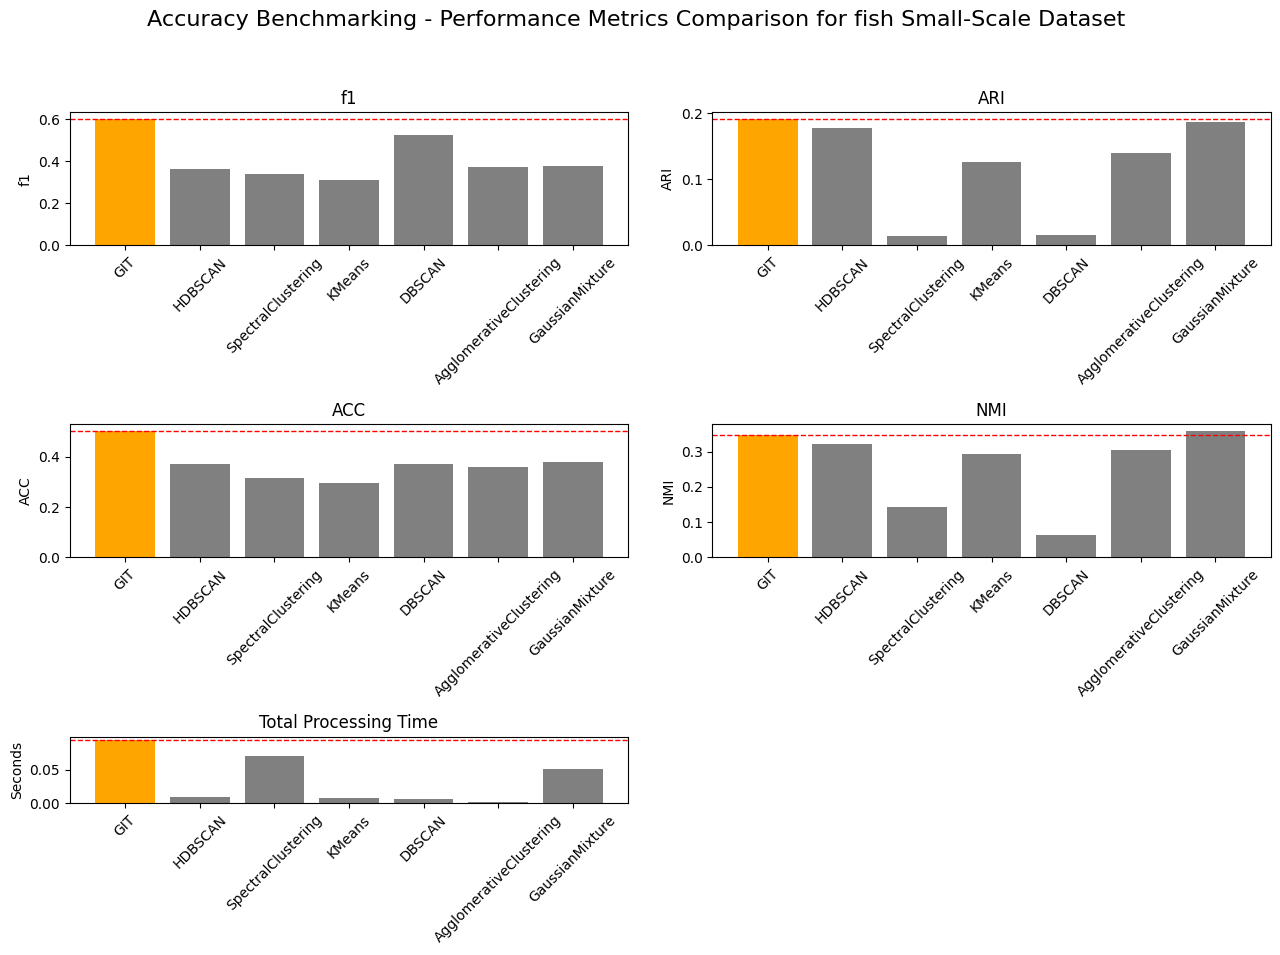

In [87]:
metrics = ['f1', 'ARI', 'ACC', 'NMI']
dataset_name = full_perf_metrics_fish['dataset'].iloc[0]
benchmark_algo = 'GIT'

# Determine GIT scores for reference lines
git_scores = full_perf_metrics_fish[full_perf_metrics_fish['Algo'] == benchmark_algo][metrics].values.flatten()

# Calculate the total processing time score for reference line
git_total_processing_time_score = full_perf_metrics_fish[full_perf_metrics_fish['Algo'] == benchmark_algo]['TotalProcessingTime'].values[0]

# Create subplots with an extra subplot for the total processing time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(13, 10), gridspec_kw={'height_ratios': [1, 1, 0.5]})
fig.suptitle(f'Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Small-Scale Dataset', fontsize=16)

# Plot each metric in a subplot
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    ax.bar(full_perf_metrics_fish['Algo'], full_perf_metrics_fish[metric], 
           color=['orange' if x == benchmark_algo else 'grey' for x in full_perf_metrics_fish['Algo']])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.axhline(y=git_scores[i], color='r', linestyle='--', linewidth=1)

# Add the last subplot for total processing time
ax_last = axs[2, 0]
ax_last.bar(full_perf_metrics_fish['Algo'], full_perf_metrics_fish['TotalProcessingTime'], 
            color=['orange' if x == benchmark_algo else 'grey' for x in full_perf_metrics_fish['Algo']])
ax_last.set_title('Total Processing Time')
ax_last.set_ylabel('Seconds')
ax_last.tick_params(axis='x', rotation=45)
ax_last.axhline(y=git_total_processing_time_score, color='r', linestyle='--', linewidth=1)

# Hide the empty subplot
fig.delaxes(axs[2][1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig(f'./Benchmark Figures/Accuracy Benchmarking - Performance Metrics Comparison for {dataset_name} Small-Scale Dataset.png', bbox_inches='tight')

# Show plot
plt.show()